# Evaluation & Plotting with Matplotlib in Python3

In [2]:
import os 
import numpy 
import pandas as pd
import matplotlib.pyplot as plt
import statistics

# Import Measurements

In [3]:
def read_file(path):
    dataframe = pd.read_csv(path)
    #print(dataframe)
    return dataframe 

         X        Y   t_0  t_active
0        1  43.4889  58.0     471.0
1        2  43.1401   NaN       NaN
2        3  42.7669   NaN       NaN
3        4  42.8794   NaN       NaN
4        5  42.8611   NaN       NaN
...    ...      ...   ...       ...
1995  1996  47.4971   NaN       NaN
1996  1997  47.6067   NaN       NaN
1997  1998  47.7257   NaN       NaN
1998  1999  47.7445   NaN       NaN
1999  2000  47.4090   NaN       NaN

[2000 rows x 4 columns]


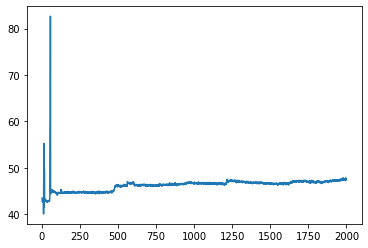

In [3]:
df = read_file('5kp/CD3/Values.csv')
print(df)
plt.plot(df['X'], df['Y'])
plt.show()

In [6]:
print(os.listdir())

var = []
data = []

for folder in os.listdir():
    if os.path.isdir(folder) and 'ipynb' not in folder:
        #print(folder)
        data.append([folder])
        for varrient in os.listdir(folder):
            #print(folder,'\n', varrient)
            data[-1].append([varrient])
            if os.listdir(folder + '/' + varrient) != []:
                for subset in os.listdir(folder + '/' + varrient):
                    #print(folder + '/' + varrient + '/' + subset)
                    value = read_file(folder + '/' + varrient + '/' + subset)
                    data[-1][-1].append(value)
                    
                    
#print(data[2][2])      

['.ipynb_checkpoints', '100kp', '35kp', '5kp', 'Evaluation&Plots.ipynb', 'glass', 'Tracker.txt']


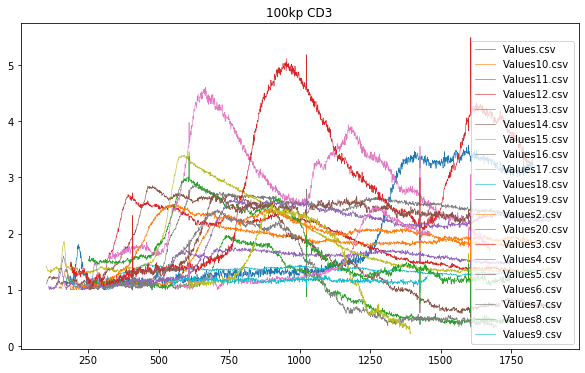

Δt Mean:  377.45
Activation Mean:  0.7897365689958222


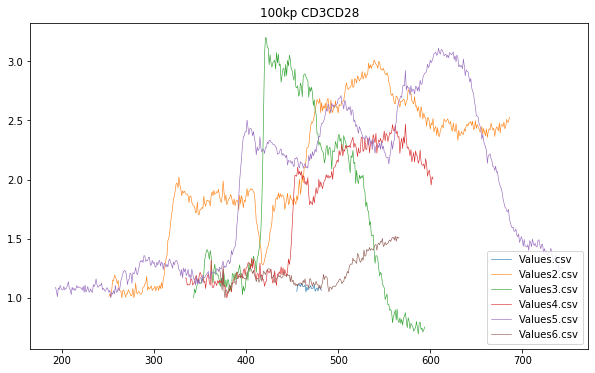

Δt Mean:  126.5
Activation Mean:  0.8683917688516806


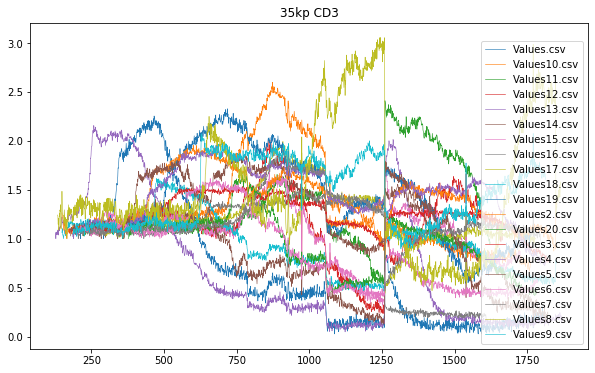

Δt Mean:  351.3
Activation Mean:  0.9080151686331993


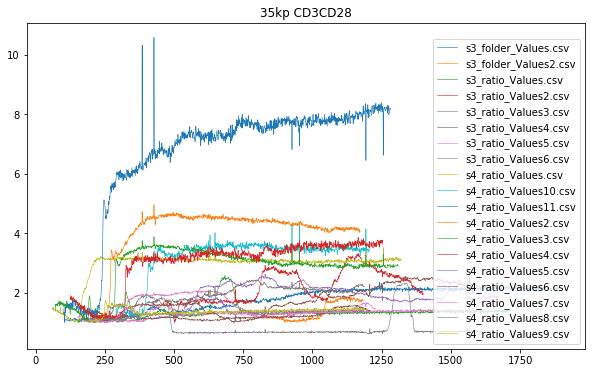

Δt Mean:  173.26315789473685
Activation Mean:  0.8571910582577369


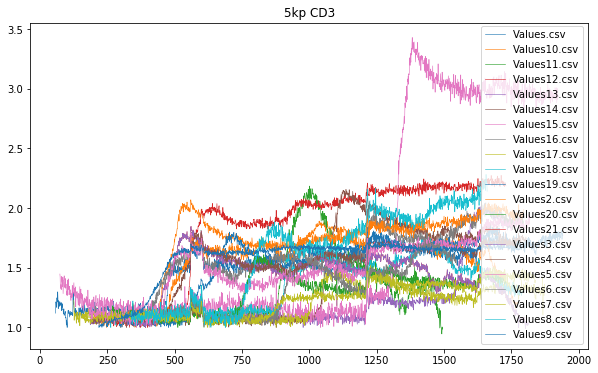

Δt Mean:  481.57142857142856
Activation Mean:  0.9099525054937766


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in double_scalars


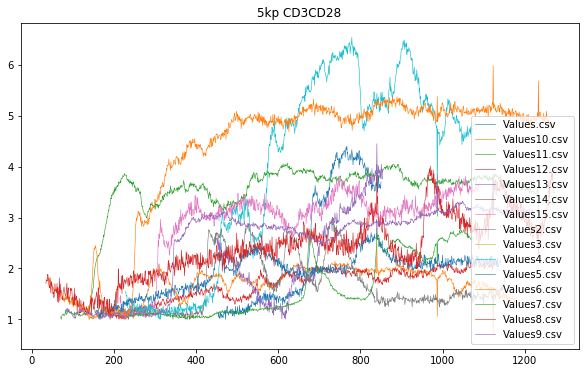

Δt Mean:  260.8
Activation Mean:  0.8564168297652055


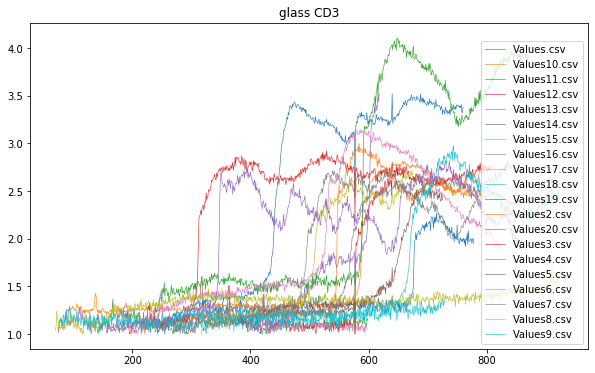

Δt Mean:  342.65
Activation Mean:  0.7402119105124806


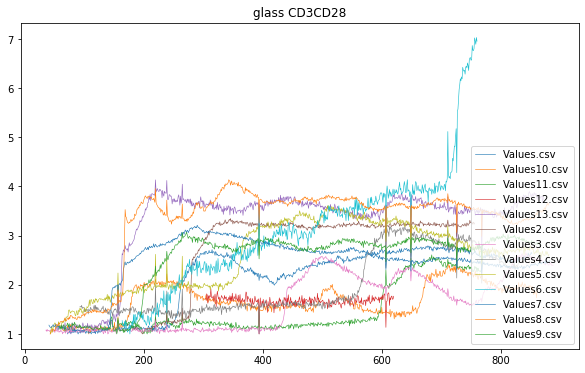

Δt Mean:  262.38461538461536
Activation Mean:  0.7730065258886926


In [8]:
Subs = []
boxplot_active = []
boxplot_time = []
box_label = []
for folder in os.listdir():
    if os.path.isdir(folder) and 'ipynb' not in folder:
        Subs.append(folder)
        
for substrate in Subs: 
    for cd in ['CD3', 'CD3CD28']:
        plt.figure(figsize = (10,6))
        delta_t = []
        activ = []
        for i in os.listdir(substrate +'/' + cd +'/'):
            #delta_t.append([])
            if 'csv' in i:
                value = read_file(substrate +'/' + cd + '/' + i)

                t_0 = value['t_0'][0]
                t_active = value['t_active'][0]
                delta_t.append(int(t_active-t_0))

                output = False

                if output == True: 
                    print(i)
                    print('Min: ',min(value['Y']))
                    print('t_0:\t\t',t_0,'s','\nt_active:\t', t_active,'s')
                    print('\u0394 -t = \t\t',(t_active-t_0), 's\n')

                # adjust range:
                x = []
                for j in range(int(t_0),len(value['Y'][int(t_0):])):
                    x.append(j)

                #Calculate Activation:
                mean = statistics.mean(value['Y'][int(t_0):int(t_active)])
                activ.append(mean/max(value['Y'][int(t_active):int(t_active)+200]))        

                #Norm Plot /start:
                y = []
                for j in range(int(t_0),len(value['Y'][int(t_0):])):     
                    norm_y = (value['Y'][j]-min(value['Y']))/ (min(value['Y'][int(t_0):int(t_active)])-min(value['Y']))
                    y.append(norm_y)



                plt.plot(x,y, label = i, linewidth = 0.6)
                #plt.plot(value['X'],value['Y'])
        plt.title(str(substrate) + ' ' + str(cd))
        plt.legend(loc = 4)        
        plt.show()
        print('\u0394t Mean: ', statistics.mean(delta_t))
        print('Activation Mean: ', statistics.mean(activ))
        boxplot_active.append(activ)
        boxplot_time.append(delta_t)
        box_label.append(str(substrate) + ' ' + str(cd))

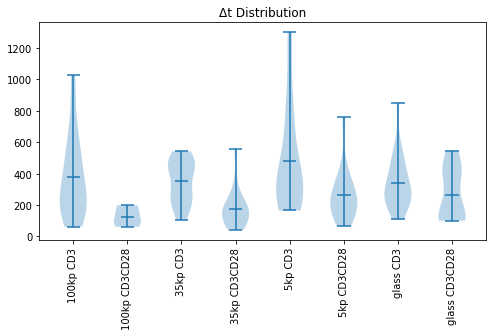

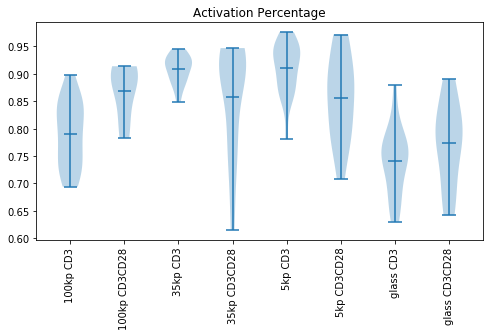

In [9]:
lab = []
for i in range(len(box_label)):
    lab.append(i+1)

# Delta t Plot
plt.figure(figsize= (8,4))
plt.title('\u0394t Distribution')
plt.violinplot(boxplot_time, showmeans = True)
plt.xticks(lab,box_label, rotation= 90)
plt.show()


# Activation Plot
plt.figure(figsize= (8,4))
plt.title('Activation Percentage')
plt.violinplot(boxplot_active, showmeans = True)
plt.xticks(lab,box_label, rotation= 90)
plt.show()

43.2298
57.56873295454545 79.5655
0.7235388824873275


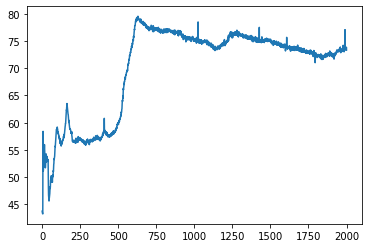

In [10]:
df = read_file('100kp/CD3/Values16.csv')
plt.plot(df['X'], df['Y'])
t_active = int(df['t_active'][0])
t_0 = int(df['t_0'][0])

print(min(df['Y']))
mean = statistics.mean(df['Y'][t_0:t_active])
print(mean, max(df['Y']))
print(mean/max(df['Y']))
#print(max(df['Y']), min(df['Y']))
plt.show()

In [21]:
for i in os.listdir('35kp/CD3/'):
    print(i)
    print(pd.read_csv('35kp/CD3/' + i).keys())

Values.csv
Index(['X', 'Y', 't_0', 't_active'], dtype='object')
Values10.csv
Index(['X', 'Y', 't_0', 't_active'], dtype='object')
Values11.csv
Index(['X', 'Y', 't_0', 't_active'], dtype='object')
Values12.csv
Index(['X', 'Y', 't_0', 't_active'], dtype='object')
Values13.csv
Index(['X', 'Y', 't_0', 't_active'], dtype='object')
Values14.csv
Index(['X', 'Y', 't_0', 't_active'], dtype='object')
Values15.csv
Index(['X', 'Y', 't_0', 't_active'], dtype='object')
Values16.csv
Index(['X', 'Y', 't_0', 't_active'], dtype='object')
Values17.csv
Index(['X', 'Y', 't_0', 't_active'], dtype='object')
Values18.csv
Index(['X', 'Y', 't_0', 't_active'], dtype='object')
Values19.csv
Index(['X', 'Y', 't_0', 't_active'], dtype='object')
Values2.csv
Index(['X', 'Y', 't_0', 't_active'], dtype='object')
Values20.csv
Index(['X', 'Y', 't_0', 't_active'], dtype='object')
Values3.csv
Index(['X', 'Y', 't_0', 't_active'], dtype='object')
Values4.csv
Index(['X', 'Y', 't_0', 't_active'], dtype='object')
Values5.csv
Ind

In [5]:
mean_set = []
labels = []
for x in data:
    for Set in x[1:]:
        labels.append(str(x[0]+ Set[0]))
        y_es = []
        for subset in Set[1:]: 
            tmp_y = []
            for j in range(len(subset['Y'])):
                norm_y = (value['Y'][j]-min(value['Y']))/ (min(value['Y'][int(t_0):int(t_active)])-min(value['Y']))
                tmp_y.append(norm_y)
            y_es.append(tmp_y)
        mean_set.append(y_es)
print(labels)

NameError: name 't_0' is not defined

In [5]:
print(len(mean_set[0]))
length = []
for x in mean_set: 
    length.append(len(x))

for i in range(min(length)):
    tmp = []
    for x in mean_set: 
        tmp.append(x[i])
    mean.append(tmp)


NameError: name 'mean_set' is not defined